# "Выявление популярных самолётов и городов назначения авиакомпании "F9"<a class="tocSkip">

## Цель исследования

<div style="border: ridge black 3px; padding: 25px">
    
<b>Целью данного исследования является определение ТОП-10 популярных городов, принимающих рейсы, а также лидирующих (популярных) моделей самолетов авиакомпании "F9".</b><br><br>

В ходе исследования мы произведём анализ на основании уже имеющихся у нас 2-х датафреймов в формате `.csv`, представляющих собой результаты 2-х запросов (ранее сформированных нами с помощью SQL).<br><br>
    
В конце документа сформулируем общий вывод.<br>
    
</div>

## Описание исходных данных
**Ниже представлено описание информации по 2-м исходным датафреймам:**

1) Путь к файлу: **/datasets/query_1.csv** — результат первого запроса.

В нём содержится информация о:
- **model** — модели самолета
- **flights_amount** — количество рейсов для каждой модели самолетов model в сентябре 2018 года

2) Путь к файлу: **/datasets/query_3.csv** — результат третьего запроса. 

В нём содержится информация о:
- **city** — городах
- **average_flights** — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

___

Ниже представлены выполненные SQL-запросы для ознакомления (подключение к базе было выполнено автоматически в среде Яндекс.Практикума):

- **1 SQL-запрос:**

Находим количество рейсов на каждой модели самолёта с вылетом в Сентябре 2018 года. Получим результирующие столбцы: model, flights_amount

[Код 1-го запроса см.здесь](https://yadi.sk/i/F1u8YYMh4FKJYA)
    
- **2 SQL-запрос:**

Находим среднее количество прибывающих рейсов в день для каждого города за Август 2018 года. Получим резуkьтирующие столбцы: city, average_flights

[Код 2-го запроса см.здесь](https://yadi.sk/i/NCQVzndtz-e1bg)

## Открытие данных

In [1]:
# импортируем нужные библиотеки 

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
req1_data = pd.read_csv('/datasets/query_1.csv')
req3_data = pd.read_csv('/datasets/query_3.csv')

# присвоим 2-м датафреймам названия согласно их содержания для наглядности при открытии

req1_data.name = 'Таблица "Модели самолётов и количество рейсов: Сентябрь 2018 г."'
req3_data.name = 'Таблица "Города и среднее количество рейсов, прибывающих за день: Август 2018 г."'

In [3]:
# выведем на экран содержимое первых 15 строк и посмотрим на общую информацию по каждой таблице:

print()
print(req1_data.name)
display(req1_data.head(15))
display(req1_data.info())
print('======================================================================================================================')
print(req3_data.name)
display(req3_data.head(15))
display(req3_data.info())


Таблица "Модели самолётов и количество рейсов: Сентябрь 2018 г."


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Таблица "Города и среднее количество рейсов, прибывающих за день: Август 2018 г."


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Наши результаты запросов не имеют пропусков. Каждый датафрейм имеет по 2 столбца. 

В датафрейме `req1_data` 8 наблюдений, т.е. 8 моделей самолетов. 

В датафрейме `req3_data` 101 наблюдение, т.е. 101 город.

Столбец `flights_amount` имеет целочисленный тип данных `int64`.
Столбец `average_flights` имеет плавающий тип данных `float64`, что логично, т.к. это среднее значение (для нас это не критично, оставим без перевода в целочисленный тип).

## Изучение предпочтений пассажиров

### Определение ТОП-10 городов по количеству прибывающих рейсов

Отсортируем датафрейм `req3_data` по убыванию среднего кол-ва рейсов и построим на основе сводной таблицы гистограмму ТОП-10 городов.

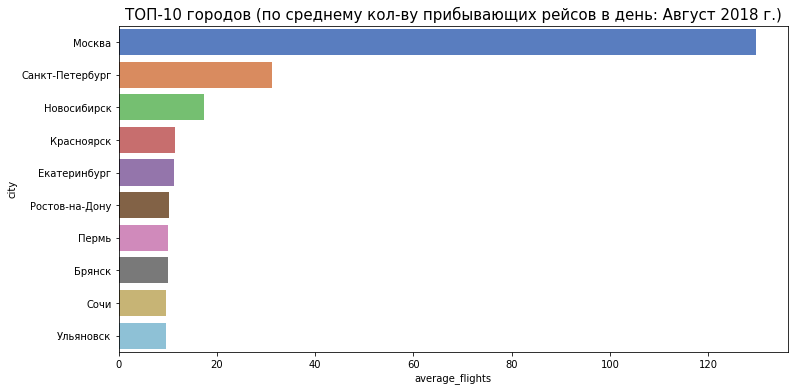

In [4]:
top10_towns = req3_data.sort_values(by='average_flights', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_towns, x='average_flights', y='city', palette="muted")
plt.title('ТОП-10 городов (по среднему кол-ву прибывающих рейсов в день: Август 2018 г.)', fontsize=15)  
plt.show()

### Модели самолётов и количество рейсов 

Отсортируем датафрейм `req1_data` по убыванию кол-ва рейсов и построим с учётом сортировки гистограмму по моделям самолетов.

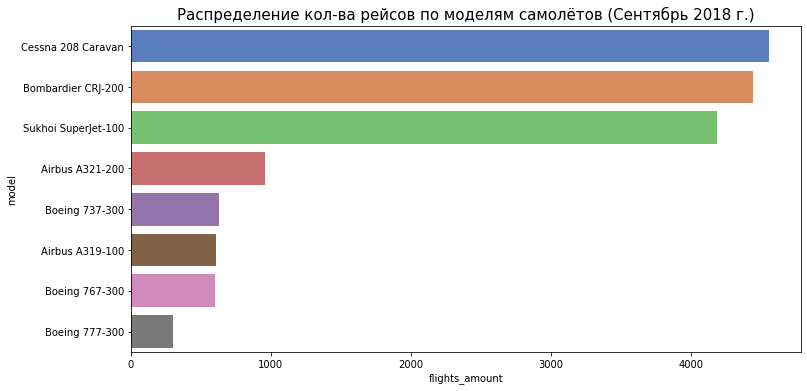

In [5]:
models_descending = req1_data.sort_values(by = 'flights_amount', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=models_descending, y='model', x='flights_amount', palette="muted")
plt.title('Распределение кол-ва рейсов по моделям самолётов (Сентябрь 2018 г.)', fontsize=15)  
plt.show()

### Города и количество рейсов 

Посмотрим на общую рейсовую картину по всем остальным городам. 

Отсортируем теперь датафрейм `req3_data` также по убыванию кол-ва рейсов и построим с учётом сортировки гистограмму по городам.

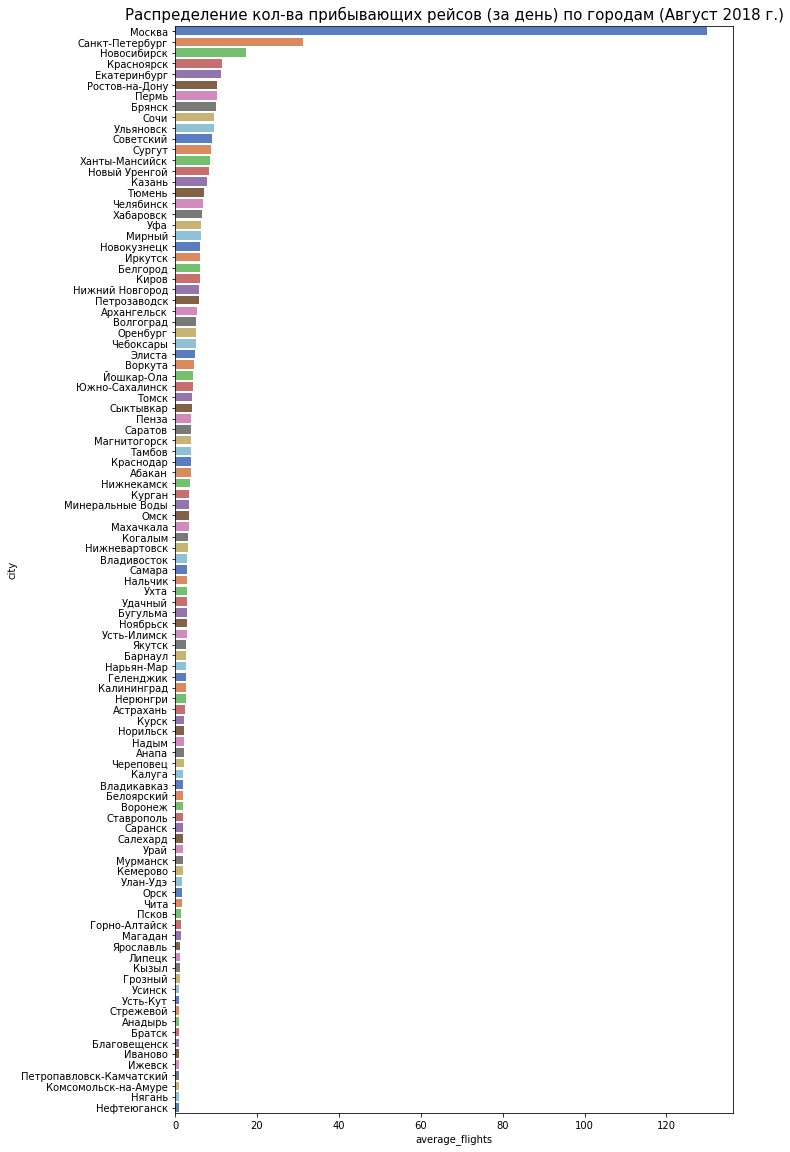

In [6]:
cities_descending = req3_data.sort_values(by = 'average_flights', ascending=False)

plt.figure(figsize=(10,20))
sns.barplot(data=cities_descending, y='city', x='average_flights', palette="muted")
plt.title('Распределение кол-ва прибывающих рейсов (за день) по городам (Август 2018 г.)', fontsize=15)  
plt.show()

## Общий вывод

<div style="border: ridge black 3px; padding: 25px">
    
<b>В результате проведенного исследования было определено следующее:</b><br><br>
    
1) <b>ТОП-10 городов</b>, рейсы в которые пользуются спросом у пассажиров (в порядке убыв.):<br>
- Москва<br>
- Санкт-Петербург<br>	
- Новосибирск<br>
- Красноярск<br>	
- Екатеринбург<br>	
- Ростов-на-Дону<br>	
- Пермь<br>
- Брянск<br>
- Сочи<br>
- Ульяновск<br><br>

При этом при детальном рассмотрении графика по 10 городам явными лидерами являются <b>3 города: Москва</b> (130 рейсов в день в среднем), <b>Санкт-Петербург</b> (31 рейс) и <b>Новосибирск</b> (17 рейсов). Остальные 7 городов имеют примерно равные показатели и не выделяются (от 11 рейсов и ниже).<br><br>

В п. 4.3. представлен график по всем остальным городам, на котором видно, что по сравнению с Москвой, Санкт-Петербургом и Новосибирском остальные города имеют очень малое кол-во рейсов.<br><br>
    
2) <b>ТОП-3 популярные модели самолётов с наибольшим числом рейсов:</b><br>
- Cessna 208 Caravan (4557 рейсов в мес.)<br>
- Bombardier CRJ-200 (4446 рейсов в мес.)<br>
- Sukhoi SuperJet-100 (4185 рейсов в мес.)<br><br>

На фоне 8 представленных моделей самолетов эти ТОП-3 модели - явные лидеры (более, чем в 4 раза превосходят остальные модели по кол-ву рейсов). Эти 3 модели малой вместимости (от 14 до 100 мест), что может говорить о том, что парк воздушных судов "F9" представлен в большинстве своем именно этими 3 моделями.<br>
Либо: есть тенденция низкого спроса на рейсы/определённые рейсы, что позволяет авиакомпании задействовать только такие модели, а не 'Boeing' и не 'Airbus'.<br><br>
<hr>
    
По запросу авиакомпании можно произвести доп.исследование на основе данных с ценами и заполняемостью бортов на рейсах.
   
</div>